# Train Test Split

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [2]:
df = pd.read_csv('model_data.csv')
df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,br_2,...,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,wf_1.0
0,221900.0,-1.096635,-0.304539,1180,0.0,1955,1955.0,-0.992008,-0.319209,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,0.870195,0.046284,2170,400.0,1951,1991.0,-0.245102,0.137043,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,-2.175269,0.502317,770,0.0,1933,1933.0,1.286644,0.218571,1,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.185533,-0.477261,1050,910.0,1965,1965.0,-0.944324,-0.504090,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,-0.203973,0.201026,1680,0.0,1987,1987.0,-0.042143,0.109869,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
linreg = LinearRegression()

# our feature variables
X = df.drop(['price'], axis=1)

# our target variable
y = df['price']

# separate our data into testing and training subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# fitting our training feature variables to our training target variable (price)
linreg.fit(X_train, y_train)

# predicted prices from our training subset
y_hat_train = linreg.predict(X_train)

# predicted prices from our testing subset
y_hat_test = linreg.predict(X_test)

# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean square error for our test and training results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', round(train_mse,2))
print('Test Mean Squared Error:', round(test_mse,2))

# calculate r-squared
r2 = round(linreg.score(X,y), 3)
print("R Squared:", r2)

# calculate mean absolute error
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:", round(mean_abs_err,2))

# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("Root Mean Squared Error:", round(rmse,2))

# calculate mean predicted price and mean actual price
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("Average Predicted Price:", round(average_predicted_price,2))
print("Average Actual Price:", round(average_actual_price,2))
print("Difference:", round(average_predicted_price - average_actual_price, 2))

Train Mean Squared Error: 18734722588.94
Test Mean Squared Error: 18450854084.6
R Squared: 0.612
Mean Absolute Error: 104553.88
Root Mean Squared Error: 135833.92
Average Predicted Price: 480476.9
Average Actual Price: 480593.35
Difference: -116.45


In [4]:
## R-Squared of .61, but RSME is 135,833.92 meaning that my model is about $135,833 off of the price value of a home.
# This will be my baseline as I start to look further into how to tighten this model up. 

In [5]:
X = df.drop(['price'], axis=1)
y = df['price']

In [6]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     613.7
Date:                Mon, 09 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:43:41   Log-Likelihood:            -2.6278e+05
No. Observations:               19842   AIC:                         5.257e+05
Df Residuals:                   19790   BIC:                         5.261e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.237e+06   1.89e+05     27.775      0.000    4.87e+06    5.61e+06
sqft_living    3533.3721   5168.306      0.684      0.494   -6596.941    1.37e+04
sqft_lot      -1.785e+04   2478.162     -7.202      0.000   -2.27e+04    -1.3e+04
sqft_above       78.8323      6.608     11.931      0.000      65.881      91.784
sqft_basement    90.3593      6.825     13.239      0.000      76.981     103.737
yr_built      -3011.6636     94.819    -31.762      0.000   -3197.516   -2825.811
yr_renovated    316.4296     96.700      3.272      0.001     126.890     505.970
sqft_living15  4.418e+04   1614.682     27.364      0.000     4.1e+04    4.73e+04
sqft_lot15    -1.634e+04   2376.987     -6.874      0.000    -2.1e+04   -1.17e+04
br_2           1.818e+04    1.1e+04      1.650      0.099   -3410.511    3.98e+04
br_3          -5623.1347   1.12e+04     -0.502      0.616   -2.76e+04    1.64e+04
br_4          -1.852e+04   1.15e+04     -1.612      0.107    -4.1e+04    3995.057
br_5          -2.713e+04   1.21e+04     -2.245      0.025   -5.08e+04   -3445.675
br_6          -3.251e+04    1.5e+04     -2.173      0.030   -6.18e+04   -3181.750
br_7          -4.363e+04   2.83e+04     -1.541      0.123   -9.91e+04    1.18e+04
br_8          -3.515e+04   4.99e+04     -0.704      0.482   -1.33e+05    6.27e+04
bath_0.75      1.239e+05   7.07e+04      1.751      0.080   -1.48e+04    2.62e+05
bath_1.0       1.105e+05   6.85e+04      1.613      0.107   -2.38e+04    2.45e+05
bath_1.25      1.159e+05   8.58e+04      1.350      0.177   -5.23e+04    2.84e+05
bath_1.5       1.132e+05   6.86e+04      1.651      0.099   -2.12e+04    2.48e+05
bath_1.75      1.254e+05   6.86e+04      1.829      0.067   -8983.593     2.6e+05
bath_2.0        1.26e+05   6.86e+04      1.837      0.066   -8476.562     2.6e+05
bath_2.25       1.35e+05   6.86e+04      1.968      0.049     526.953     2.7e+05
bath_2.5       1.251e+05   6.86e+04      1.823      0.068   -9428.790     2.6e+05
bath_2.75      1.526e+05   6.87e+04      2.220      0.026    1.79e+04    2.87e+05
bath_3.0       1.527e+05   6.88e+04      2.219      0.026    1.78e+04    2.88e+05
bath_3.25       1.77e+05    6.9e+04      2.566      0.010    4.18e+04    3.12e+05
bath_3.5       1.891e+05   6.89e+04      2.744      0.006     5.4e+04    3.24e+05
bath_3.75      2.329e+05   7.02e+04      3.318      0.001    9.53e+04     3.7e+05
bath_4.0       1.891e+05   7.05e+04      2.680      0.007    5.08e+04    3.27e+05
bath_4.25      2.058e+05   7.33e+04      2.806      0.005     6.2e+04    3.49e+05
bath_4.5       1.422e+05   7.16e+04      1.987      0.047    1917.636    2.83e+05
bath_4.75      1.612e+05   9.23e+04      1.747      0.081   -1.96e+04    3.42e+05
flr_1.5        9761.6661   4021.947      2.427      0.015    1878.313    1.76e+04
flr_2.0        7076.1217   3618.912      1.955   

In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
linreg.coef_

array([ 3.53337215e+03, -1.78465884e+04,  7.88323163e+01,  9.03592944e+01,
       -3.01166358e+03,  3.16429559e+02,  4.41836493e+04, -1.63392464e+04,
        1.81800307e+04, -5.62313474e+03, -1.85180246e+04, -2.71320099e+04,
       -3.25066265e+04, -4.36287709e+04, -3.51461239e+04,  1.23850744e+05,
        1.10492906e+05,  1.15895842e+05,  1.13249421e+05,  1.25437447e+05,
        1.25993271e+05,  1.35041734e+05,  1.25052114e+05,  1.52565618e+05,
        1.52695168e+05,  1.76962685e+05,  1.89064665e+05,  2.32902334e+05,
        1.89060610e+05,  2.05768510e+05,  1.42223686e+05,  1.61214116e+05,
        9.76166608e+03,  7.07612168e+03,  3.61847653e+04,  7.26421041e+04,
        7.11002447e+04,  3.47246724e+04,  6.81922314e+04,  8.70389639e+04,
        1.19050684e+05,  4.60887619e+03,  2.92398684e+02,  5.29056881e+04,
        1.35542930e+05,  2.29004878e+05,  3.59034122e+05,  4.45073190e+05,
        5.38923247e+05,  5.42870816e+05,  2.61725862e+05])

In [9]:
linreg.intercept_

5237398.976990887

# Stepwise Selection

### By using stepwise selection, I can see which specific features I can remove, based on their high p-values.

In [10]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [11]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  gd_9                           with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  gd_10                          with p-value 0.0
Add  gd_8                           with p-value 3.68677e-308
Add  gd_11                          with p-value 0.0
Add  sqft_lot                       with p-value 2.49991e-208
Add  sqft_living15                  with p-value 1.42514e-151
Add  gd_7                           with p-value 8.32235e-80
Add  wf_1.0                         with p-value 2.23315e-45
Add  con_5                          with p-value 8.29344e-29
Add  gd_12                          with p-value 4.69426e-26
Add  flr_3.0                        with p-value 4.56901e-25
Add  br_2                           with p-value 2.17476e-21
Add  bath_3.5                       with p-value 7.00226e-21
Add  bath_3.25                      with p-value 1.38497e-13
Add  bath_3.75                      with p-value 1.46474e-14


In [12]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'br_2',
       'br_3', 'br_4', 'br_5', 'br_6', 'br_7', 'br_8', 'bath_0.75', 'bath_1.0',
       'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0', 'bath_2.25',
       'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25', 'bath_3.5',
       'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5', 'bath_4.75',
       'flr_1.5', 'flr_2.0', 'flr_2.5', 'flr_3.0', 'flr_3.5', 'con_2', 'con_3',
       'con_4', 'con_5', 'gd_4', 'gd_5', 'gd_6', 'gd_7', 'gd_8', 'gd_9',
       'gd_10', 'gd_11', 'gd_12', 'wf_1.0'],
      dtype='object')

In [13]:
original_features_count = len(X.columns)
stepwise_features = ['sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'br_2',
       'br_3', 'br_4', 'br_5', 'br_6', 'br_7', 'br_8', 'bath_0.75', 'bath_1.0',
       'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0', 'bath_2.25',
       'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25', 'bath_3.5',
       'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5', 'bath_4.75',
       'flr_1.5', 'flr_2.0', 'flr_2.5', 'flr_3.0', 'flr_3.5', 'con_2', 'con_3',
       'con_4', 'con_5', 'gd_4', 'gd_5', 'gd_6', 'gd_7', 'gd_8', 'gd_9',
       'gd_10', 'gd_11', 'gd_12', 'wf_1.0']
stepwise_features_count = len(stepwise_features)
print("Original # of Feature Variables: ", original_features_count)
print("Selected # of Feature Variables: ", stepwise_features_count)
print("# of Feature Variables Removed: ", original_features_count - stepwise_features_count)

Original # of Feature Variables:  51
Selected # of Feature Variables:  50
# of Feature Variables Removed:  1


### Now after removing the sqft_living, since it had a high p-value, I will run the test/train again as well as OLS to see how my model looks. 

In [14]:
#Adjusting for new features
X_new = X[stepwise_features]

In [15]:
linreg = LinearRegression()

# our feature variables
X_new = X[stepwise_features]

# our target variable
y = df['price']

# separate our data into testing and training subsets
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=2)

# fitting our training feature variables to our training target variable (price)
linreg.fit(X_train, y_train)

# predicted prices from our training subset
y_hat_train = linreg.predict(X_train)

# predicted prices from our testing subset
y_hat_test = linreg.predict(X_test)

# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean square error for our test and training results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', round(train_mse,2))
print('Test Mean Squared Error:', round(test_mse,2))

# calculate r-squared
r2 = round(linreg.score(X_new,y), 3)
print("R Squared:", r2)

# calculate mean absolute error
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:", round(mean_abs_err,2))

# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("Root Mean Squared Error:", round(rmse,2))

# calculate mean predicted price and mean actual price
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("Average Predicted Price:", round(average_predicted_price,2))
print("Average Actual Price:", round(average_actual_price,2))
print("Difference:", round(average_predicted_price - average_actual_price, 2))

Train Mean Squared Error: 18734760468.99
Test Mean Squared Error: 18451757113.48
R Squared: 0.612
Mean Absolute Error: 104551.05
Root Mean Squared Error: 135837.24
Average Predicted Price: 480481.55
Average Actual Price: 480593.35
Difference: -111.8


In [29]:
import statsmodels.api as sm
XX = sm.add_constant(X_new)
model = sm.OLS(y, XX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     626.0
Date:                Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:03:05   Log-Likelihood:            -2.6278e+05
No. Observations:               19842   AIC:                         5.257e+05
Df Residuals:                   19791   BIC:                         5.261e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.23e+06   1.88e+05     27.783      0.000    4.86e+06     5.6e+06
sqft_lot      -1.777e+04   2475.858     -7.179      0.000   -2.26e+04   -1.29e+04
sqft_above       82.8057      3.143     26.343      0.000      76.645      88.967
sqft_basement    94.4214      3.358     28.115      0.000      87.839     101.004
yr_built      -3014.3523     94.736    -31.819      0.000   -3200.042   -2828.662
yr_renovated    316.4301     96.699      3.272      0.001     126.893     505.968
sqft_living15   4.43e+04   1606.156     27.579      0.000    4.11e+04    4.74e+04
sqft_lot15    -1.638e+04   2376.216     -6.893      0.000    -2.1e+04   -1.17e+04
br_2           1.931e+04   1.09e+04      1.773      0.076   -2037.134    4.07e+04
br_3          -3885.4948   1.09e+04     -0.356      0.722   -2.53e+04    1.75e+04
br_4          -1.667e+04   1.12e+04     -1.493      0.135   -3.85e+04    5210.901
br_5          -2.538e+04   1.18e+04     -2.149      0.032   -4.85e+04   -2233.973
br_6          -3.075e+04   1.47e+04     -2.086      0.037   -5.96e+04   -1862.679
br_7          -4.177e+04   2.82e+04     -1.483      0.138    -9.7e+04    1.34e+04
br_8          -3.386e+04   4.99e+04     -0.679      0.497   -1.32e+05     6.4e+04
bath_0.75      1.233e+05   7.07e+04      1.743      0.081   -1.53e+04    2.62e+05
bath_1.0       1.104e+05   6.85e+04      1.611      0.107   -2.39e+04    2.45e+05
bath_1.25      1.165e+05   8.58e+04      1.357      0.175   -5.18e+04    2.85e+05
bath_1.5       1.137e+05   6.86e+04      1.658      0.097   -2.07e+04    2.48e+05
bath_1.75      1.262e+05   6.86e+04      1.840      0.066   -8218.281    2.61e+05
bath_2.0       1.268e+05   6.86e+04      1.848      0.065   -7691.431    2.61e+05
bath_2.25      1.359e+05   6.86e+04      1.981      0.048    1404.985     2.7e+05
bath_2.5        1.26e+05   6.86e+04      1.836      0.066   -8495.024     2.6e+05
bath_2.75      1.534e+05   6.87e+04      2.232      0.026    1.87e+04    2.88e+05
bath_3.0       1.535e+05   6.88e+04      2.231      0.026    1.86e+04    2.88e+05
bath_3.25      1.774e+05   6.89e+04      2.574      0.010    4.23e+04    3.13e+05
bath_3.5       1.895e+05   6.89e+04      2.750      0.006    5.45e+04    3.25e+05
bath_3.75       2.33e+05   7.02e+04      3.320      0.001    9.54e+04    3.71e+05
bath_4.0       1.891e+05   7.05e+04      2.680      0.007    5.08e+04    3.27e+05
bath_4.25      2.053e+05   7.33e+04      2.800      0.005    6.16e+04    3.49e+05
bath_4.5       1.421e+05   7.16e+04      1.985      0.047    1766.520    2.82e+05
bath_4.75      1.596e+05   9.22e+04      1.731      0.084   -2.12e+04     3.4e+05
flr_1.5        1.002e+04   4004.601      2.501      0.012    2167.009    1.79e+04
flr_2.0        7127.1565   3618.093      1.970      0.049      35.390    1.42e+04
flr_2.5        3.629e+04   1.38e+04      2.638   

### There was a slight change, but I am still seeing some high p-values. I will run the stepwise selection a few more times to see how I can adjust my model. 

In [16]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [17]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  gd_9                           with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  gd_10                          with p-value 0.0
Add  gd_8                           with p-value 3.68677e-308
Add  gd_11                          with p-value 0.0
Add  sqft_lot                       with p-value 2.49991e-208
Add  sqft_living15                  with p-value 1.42514e-151
Add  gd_7                           with p-value 8.32235e-80
Add  wf_1.0                         with p-value 2.23315e-45
Add  con_5                          with p-value 8.29344e-29
Add  gd_12                          with p-value 4.69426e-26
Add  flr_3.0                        with p-value 4.56901e-25
Add  br_2                           with p-value 2.17476e-21
Add  bath_3.5                       with p-value 7.00226e-21
Add  bath_3.25                      with p-value 1.38497e-13
Add  bath_3.75                      with p-value 1.46474e-14


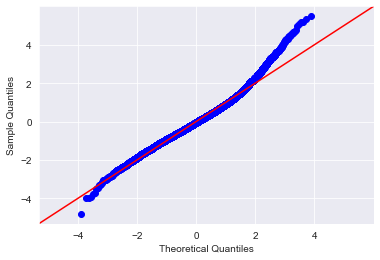

In [35]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()